In [4]:
import defi_tools as dft
import matplotlib.pyplot as plt
import pandas as pd


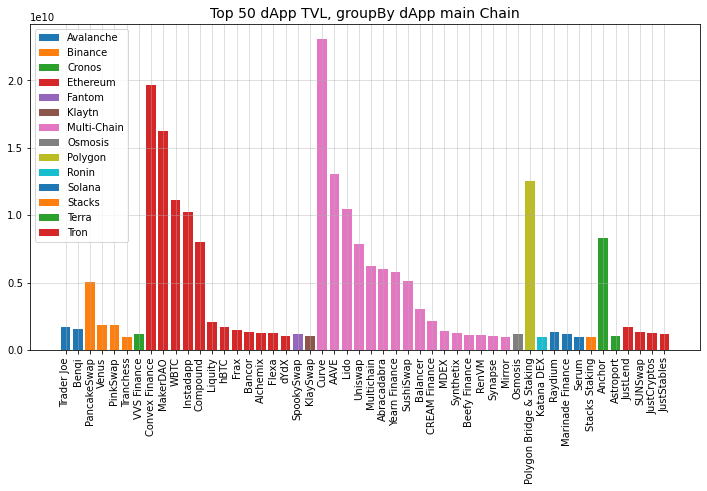

In [2]:
df = dft.getProtocols()
fig, ax = plt.subplots(figsize=(12,6))

n = 50 # quantity to show
top = df.sort_values('tvl', ascending=False).head(n)

chains = top.groupby('chain').size().index.values.tolist()
for chain in chains:
    filtro = top.loc[top.chain==chain]
    ax.bar(filtro.index, filtro.tvl, label=chain)

ax.set_title(f'Top {n} dApp TVL, groupBy dApp main Chain', fontsize=14)
ax.grid(alpha=0.5)
plt.legend()
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Historical TVL main protocols in billions'}, xlabel='date'>

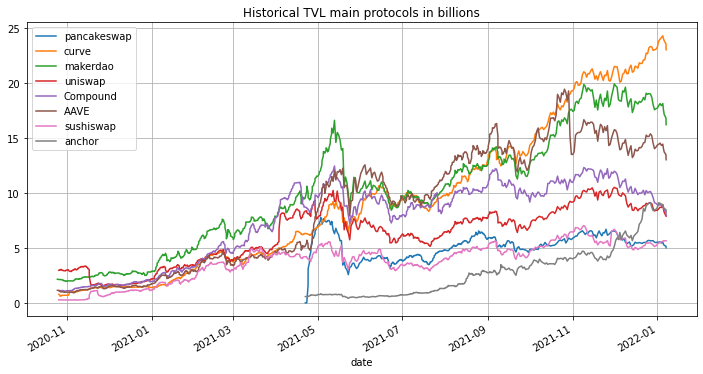

In [5]:
exchanges = ['pancakeswap', 'curve', 'makerdao', 'uniswap','Compound', 'AAVE','sushiswap','anchor']

hist = [dft.getProtocol(exchange)[1] for exchange in exchanges]
df = pd.concat(hist, axis=1)
df.columns = exchanges

title = 'Historical TVL main protocols in billions'
df.iloc[-730:].interpolate().divide(10**9).plot(figsize=(12,6), grid=True, title=title)

# PancakeSwap API

In [6]:
import defi_tools as dft

dft.pcsTokenInfo('cake')

{'name': 'PancakeSwap Token',
 'symbol': 'Cake',
 'price': '10.63003992159628963858768462078',
 'price_BNB': '0.0233445113140142839883475916129'}

In [7]:
dft.pcsPairs().info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c_0xe9e7CEA3DedcA5984780Bafc599bD69ADd087D56 to 0x0a2046C7fAa5a5F2b38C0599dEB4310AB781CC83_0xe9e7CEA3DedcA5984780Bafc599bD69ADd087D56
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   pair_address   100 non-null    object        
 1   base_name      100 non-null    object        
 2   base_symbol    100 non-null    object        
 3   base_address   100 non-null    object        
 4   quote_name     100 non-null    object        
 5   quote_symbol   100 non-null    object        
 6   quote_address  100 non-null    object        
 7   price          100 non-null    float64       
 8   base_volume    100 non-null    float64       
 9   quote_volume   100 non-null    float64       
 10  liquidity      100 non-null    float64       
 11  liquidity_BNB  100 non-null    float64       
 12  updated        

# Inflation Rate

# Farm Simulation

## Show Coingecko IDs by Rank

In [1]:
import defi_tools as dft

ids = dft.getGeckoIDs()
ids[:10]

['bitcoin',
 'ethereum',
 'binancecoin',
 'tether',
 'solana',
 'cardano',
 'ripple',
 'polkadot',
 'shiba-inu',
 'dogecoin']

In [10]:
btc = dft.geckoPrice('bitcoin','usd')
btc['bitcoin']['usd']

42361

## Farm Simulation

{'Token 1': 'huobi-token',
 'Token 2': 'tether',
 'start': '2021-01-01',
 'fixed APR': '45%',
 'Buy & Hold': '68.90%',
 'Impermanent Loss': '-8.66%',
 'Farming Rewards': '75.45%',
 'Farming + Rewards - IL': '153.02%'}

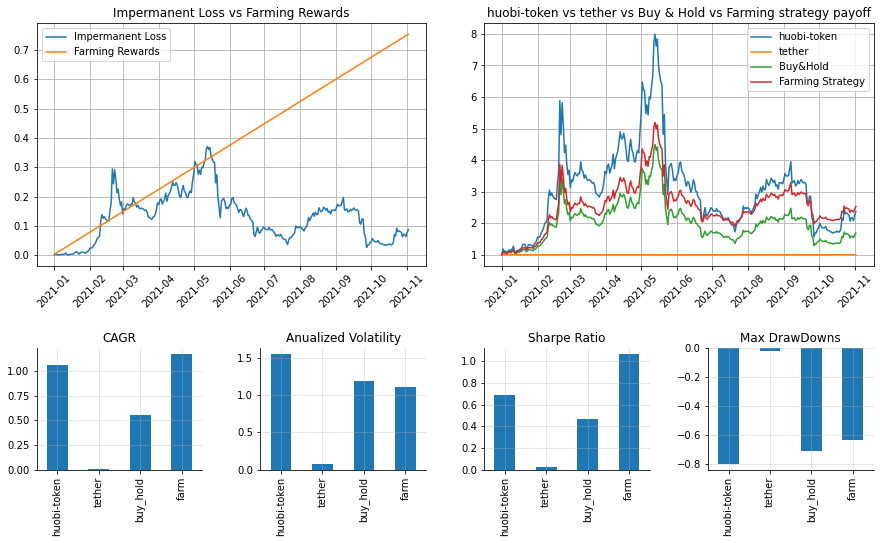

In [1]:
import defi_tools as dft

pair = ['huobi-token','tether']
apr = 45

dft.farmSimulate(pair, apr, start='2021-01-01')

In [2]:
dft.geckoHistorical('bitcoin')

,price,market_caps,total_volumes
date,,,
2013-04-28 00:00:00,135.300000,1.500518e+09,0.000000e+00
2013-04-29 00:00:00,141.960000,1.575032e+09,0.000000e+00
2013-04-30 00:00:00,135.300000,1.501657e+09,0.000000e+00
2013-05-01 00:00:00,117.000000,1.298952e+09,0.000000e+00
2013-05-02 00:00:00,103.430000,1.148668e+09,0.000000e+00
...,...,...,...
2021-10-30 00:00:00,62283.198056,1.178047e+12,3.864897e+10
2021-10-31 00:00:00,61837.257003,1.166424e+12,3.181022e+10
2021-11-01 00:00:00,61471.868463,1.159842e+12,3.249495e+10



Start value USD 1000, cake USD 18.47, WBNB USD 552.66

Results assuming CAKE 50%, and WBNB -25%
End value estimate USD 1061, iloss: -5.72%


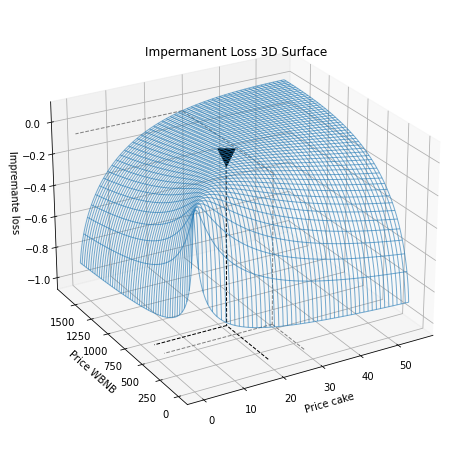

(1060.6601717798214, -0.05719095841793653)

In [3]:
dft.value_f, iloss = dft.iloss_simulate('cake','bnb', value=1000, base_pct_chg=50, quote_pct_chg=-25)
dft.value_f, iloss